In [2]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt



In [3]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [4]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,module_domain,module_presentation_length,term,year,num_of_prev_attempts,pass_fail_ind,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,0,0,3733,1,261,0,0,0,NaN,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,1,6516,0,269,0,1,0,1.0,-52.0,0,0,2,0,3,8.0,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,2,2,8462,1,261,0,0,0,NaN,-137.0,0,0,2,2,3,3.0,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,3,3,8462,1,262,0,1,1,NaN,-38.0,0,0,2,2,3,3.0,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,1.0,0.0
4,4,4,11391,0,268,0,0,0,1.0,-159.0,0,0,2,1,3,9.0,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [5]:
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
pass_fail_ind                 float64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
cma_assmt_score               float64
tma_assmt_score               float64
tma_cma_assmt_score           float64
final_exam  


df['imd_band'] = df['imd_band'].map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)
df['gender'] = df['gender'].map({'M': 0,'F': 1})
df['age_band'] = df['age_band'].map({'0-35': 0,'35-55': 1,'55<=':2})
df['region'] = df['region'].map({'Scotland': 0,'East Anglian Region': 1,'London Region':2,'South Region': 3,'North Western Region': 4,'West Midlands Region':5,'South West Region': 6,'East Midlands Region': 7,'South East Region':8,'Wales': 9,'Yorkshire Region': 10,'North Region':11,'Ireland':12})
df['pass_fail_ind'] = df['pass_fail_ind'].map({'FAIL':0,'PASS':1})
df['disability'] = df['disability'].map({'N':0,'Y':1})
df['highest_education'] = df['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})


In [6]:
df['module_domain'].value_counts()

1    21402
0    11191
Name: module_domain, dtype: int64

In [14]:
df['term'].isnull().sum()

0

In [19]:
df.groupby(['year', 'term','module_domain']).count()

level_0  index  id_student  \
year term module_domain                               
0    0    0                 3572   3572        3572   
          1                 5273   5273        5273   
     1    0                 1767   1767        1767   
          1                 2917   2917        2917   
1    0    0                 3406   3406        3406   
          1                 7854   7854        7854   
     1    0                 2446   2446        2446   
          1                 5358   5358        5358   

                         module_presentation_length  num_of_prev_attempts  \
year term module_domain                                                     
0    0    0                                    3572                  3572   
          1                                    5273                  5273   
     1    0                                    1767                  1767   
          1                                    2917                  2917   
1    0    0                                    3406                  3406   
          1                                    7854                  7854   
     1    0                                    2446                  2446   
          1                                    5358                  5358   

                         pass_fail_ind  date_registration  disability  gender  \
year term module_domain                                                         
0    0    0                       2802               3570        3572    3572   
          1                       3674               5265        5273    5273   
     1    0                       1262               1766        1767    1767   
          1                       2074               2910        2917    2917   
1    0    0                       2465               3405        3406    3406   
          1                       4969               7846        7854    7854   
     1    0                       1856               2441        2446    2446   
          1                       3335               5345        5358    5358   

                         age_band  region  highest_education  imd_band  \
year term module_domain                                                  
0    0    0                  3572    3572               3572      3538   
          1                  5273    5273               5273      5040   
     1    0                  1767    1767               1767      1746   
          1                  2917    2917               2917      2761   
1    0    0                  3406    3406               3406      3384   
          1                  7854    7854               7854      7481   
     1    0                  2446    2446               2446      2430   
          1                  5358    5358               5358      5102   

                         studied_credits  b4_sum_clicks  q1_sum_clicks  \
year term module_domain                                                  
0    0    0                         3572           2878           2878   
          1                         5273           4203           4203   
     1    0                         1767           1368           1368   
          1                         2917           2433           2433   
1    0    0                         3406           2733           2733   
          1                         7854           6189           6189   
     1    0                         2446           1889           1889   
          1                         5358           4100           4100   

                         q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  \
year term module_domain                                                
0    0    0                       2878           2878           2878   
          1                       4203           4203           4203   
     1    0                       1368           1368           1368   
          1                       2433           2

In [44]:
tempDf = df[['year','term','module_domain','region','gender','disability','allclicks','age_band','module_presentation_length','num_of_prev_attempts','pass_fail_ind','highest_education','is_reenrolled','imd_band','studied_credits']]



In [58]:
tempDf = tempDf.loc[(tempDf.year == 1) & (tempDf.term == 0) & (tempDf.module_domain == 1)]
tempDf.head(20)

# heatDf = tempDf.drop['year','term','module_domain'] 

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,pass_fail_ind,highest_education,is_reenrolled,imd_band,studied_credits
3,1,0,1,2,0,0,10.0,2,262,1,NaN,3,1.0,3.0,60
7,1,0,1,1,1,0,910.0,0,269,0,1.0,2,0.0,5.0,120
16,1,0,1,0,1,0,997.0,0,269,0,NaN,3,0.0,4.0,60
17,1,0,1,2,1,0,113.0,0,262,2,NaN,3,0.0,1.0,150
30,1,0,1,10,0,0,1847.0,0,269,0,1.0,3,0.0,7.0,120
33,1,0,1,6,0,0,100.0,0,262,1,NaN,1,0.0,6.0,60
46,1,0,1,0,0,0,NaN,0,269,0,0.0,1,0.0,2.0,30
47,1,0,1,8,0,0,645.0,1,269,0,1.0,1,0.0,8.0,60
50,1,0,1,10,1,0,105.0,0,269,0,NaN,1,0.0,6.0,60
53,1,0,1,7,0,0,329.0,0,269,0,NaN,2,0.0,8.0,150


# Define a dictionary containing Students data 
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Height': [5.1, 6.2, 5.1, 5.2], 
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']} 
  
# Define a dictionary with key values of 
# an existing column and their respective 
# value pairs as the # values for our new column. 
address = {'Delhi': 'Jai', 'Bangalore': 'Princi', 
           'Patna': 'Gaurav', 'Chennai': 'Anuj'} 
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 
  
# Provide 'Address' as the column name 
df['Address'] = address 
  
# Observe the output 
df 

In [46]:
tempDf.dtypes

year                            int64
term                            int64
module_domain                   int64
region                          int64
gender                          int64
disability                      int64
allclicks                     float64
age_band                        int64
module_presentation_length      int64
num_of_prev_attempts            int64
pass_fail_ind                 float64
highest_education               int64
is_reenrolled                 float64
imd_band                      float64
studied_credits                 int64
dtype: object

#label
bins = [0, 12, 17, 60, np.inf]
  labels = ['child', 'teenager', 'adult', 'elder']
  age_groups = pd.cut(titanic.age, bins, labels=labels)
  titanic['age_group'] = age_groups

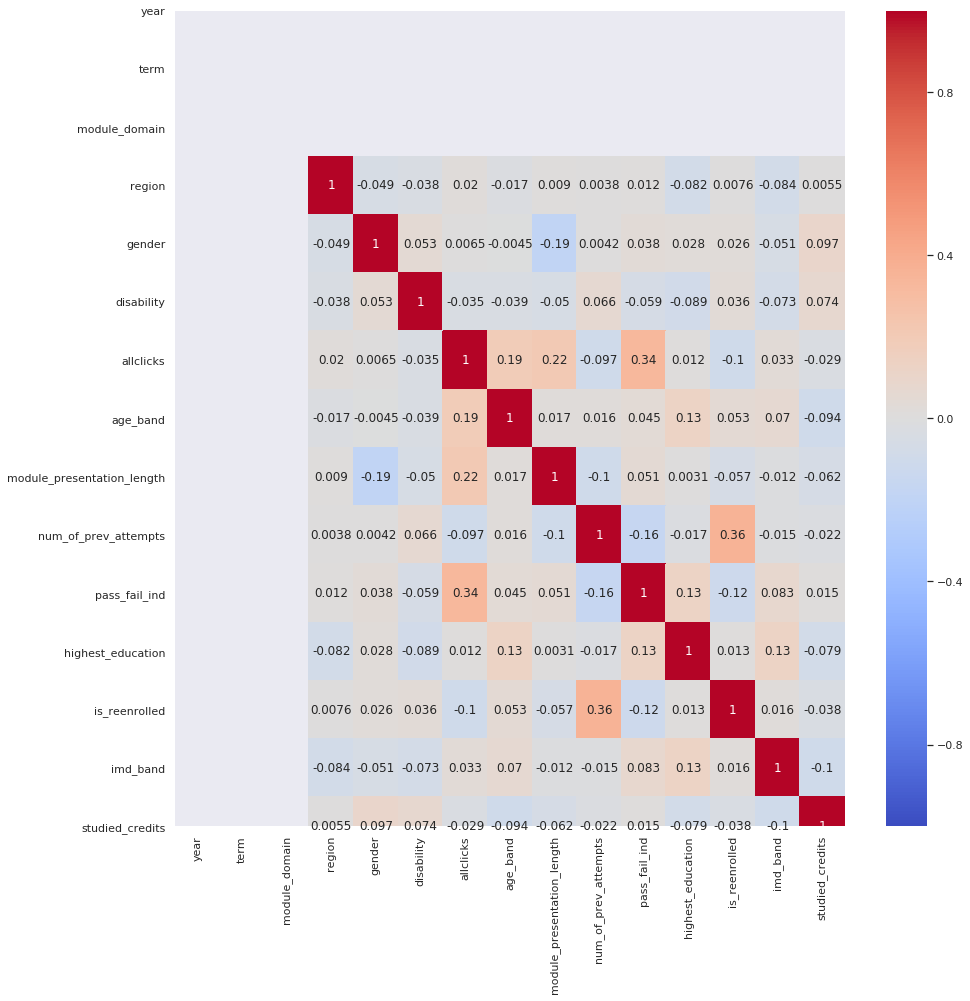

In [57]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


plt.figure(figsize=(15,15))

sns.heatmap(tempDf.corr(),vmin=-1,cmap='coolwarm',annot=True);

# tempDf = tempDf.pivot("year", "term", "module_domain")
# ax = sns.heatmap(tempDf)

# sns.heatmap(tempDf.corr(), annot=True, fmt=".2f", linewidths=.05)
plt.show()